In [3]:
# Análise da base Adult (Census Income)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

dataset = "adult.csv"
df = pd.read_csv(dataset)
df.head(60)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
for col in df.columns:
    if "?" in df[col].unique():
        print(col, df[col].value_counts()["?"])

df.replace("?", np.nan, inplace=True)


In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:  # só colunas com NaN
        if df[col].dtype in ["int64", "float64"]:  
            # Quantitativa → média
            df[col].fillna(df[col].mean(), inplace=True)
        else:  
            # Qualitativa → moda
            df[col].fillna(df[col].mode()[0], inplace=True)

# Conferir resultado
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


/tmp/ipykernel_27899/1886933834.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
df.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [19]:
desc = df.describe().T
desc['missing'] = df.isnull().sum()
desc['unique'] = df.nunique()
desc = desc[['count', 'missing', 'unique', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
desc


,count,missing,unique,mean,std,min,25%,50%,75%,max
age,29360.0,0,62,38.342064,12.228436,17.0,28.0,37.0,47.0,78.0
fnlwgt,29360.0,0,19257,178976.070129,84754.238892,13769.0,116657.0,176389.0,228583.0,399155.0
educational-num,29360.0,0,16,9.998535,2.483413,1.0,9.0,10.0,12.0,16.0
capital-gain,29360.0,0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
capital-loss,29360.0,0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
hours-per-week,29360.0,0,20,41.449012,3.948689,33.0,40.0,40.0,40.0,52.0


In [15]:
def refirar_outliers_iqr(dataframe, col_name):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar os dados dentro dos limites
    filtered_df = dataframe[(dataframe[col_name] >= lower_bound) & (dataframe[col_name] <= upper_bound)]
    return filtered_df

df = refirar_outliers_iqr(df, 'age')
df = refirar_outliers_iqr(df, 'fnlwgt')
df = refirar_outliers_iqr(df, 'capital-gain')
df = refirar_outliers_iqr(df, 'capital-loss')
df = refirar_outliers_iqr(df, 'hours-per-week')

In [20]:
desc = df.describe().T
desc['missing'] = df.isnull().sum()
desc['unique'] = df.nunique()
desc = desc[['count', 'missing', 'unique', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
desc


,count,missing,unique,mean,std,min,25%,50%,75%,max
age,29360.0,0,62,38.342064,12.228436,17.0,28.0,37.0,47.0,78.0
fnlwgt,29360.0,0,19257,178976.070129,84754.238892,13769.0,116657.0,176389.0,228583.0,399155.0
educational-num,29360.0,0,16,9.998535,2.483413,1.0,9.0,10.0,12.0,16.0
capital-gain,29360.0,0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
capital-loss,29360.0,0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
hours-per-week,29360.0,0,20,41.449012,3.948689,33.0,40.0,40.0,40.0,52.0


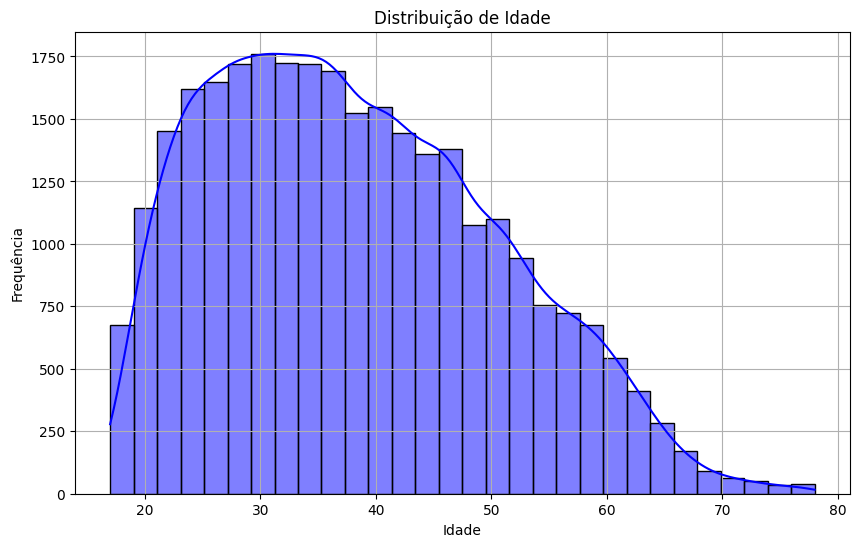

In [21]:
# Histograma de Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid()
plt.show()

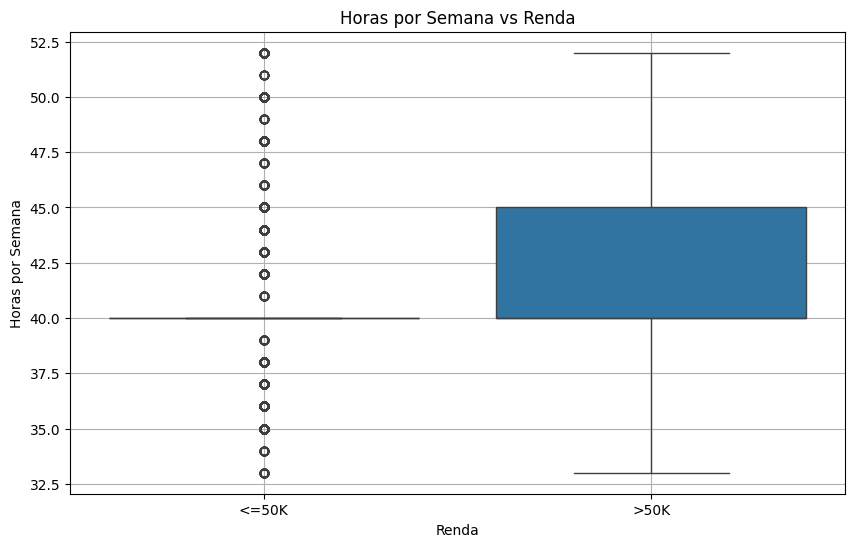

In [22]:
# Boxplot: Horas por semana vs Renda'
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Horas por Semana vs Renda')
plt.xlabel('Renda')
plt.ylabel('Horas por Semana')
plt.grid()
plt.show()

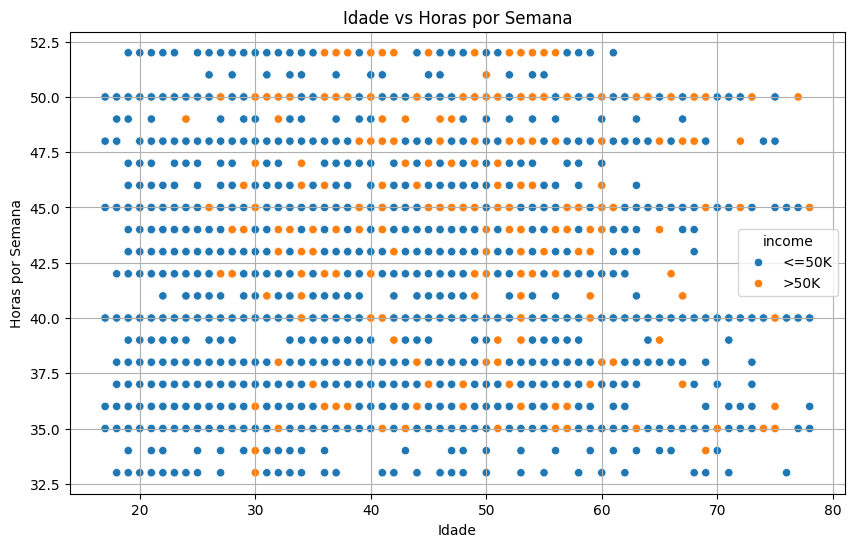

In [23]:
# Dispersão: Idade vs Horas por semana
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df)
plt.title('Idade vs Horas por Semana')
plt.xlabel('Idade')
plt.ylabel('Horas por Semana')
plt.grid()
plt.show()

/tmp/ipykernel_27899/1007600631.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education', y='hours-per-week', hue='income', data=df, ci=None)


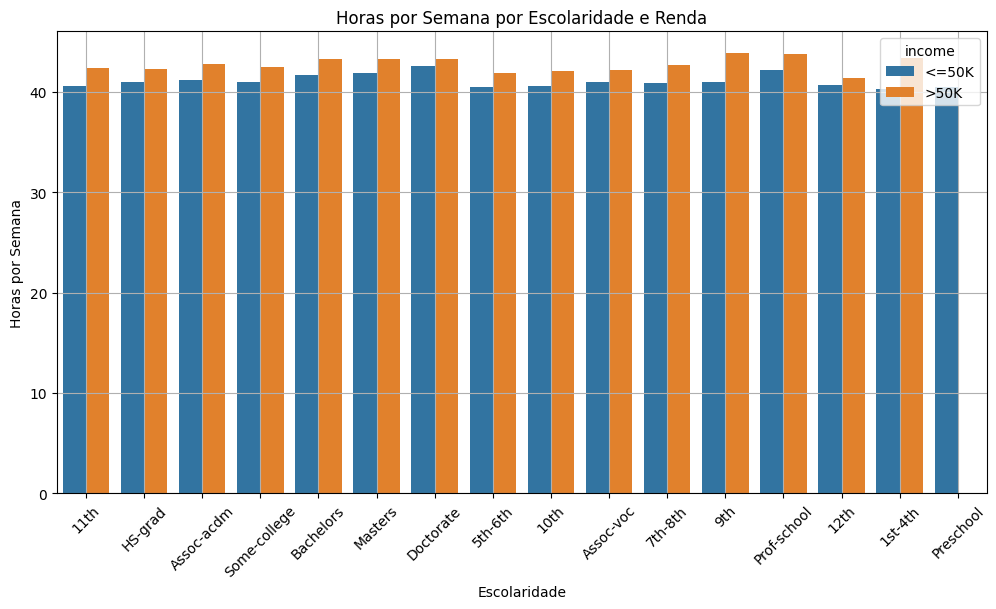

In [24]:
# Renda Média por escolaridade
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='hours-per-week', hue='income', data=df, ci=None)
plt.title('Horas por Semana por Escolaridade e Renda')
plt.xlabel('Escolaridade')
plt.ylabel('Horas por Semana')
plt.xticks(rotation=45)
plt.grid()
plt.show()

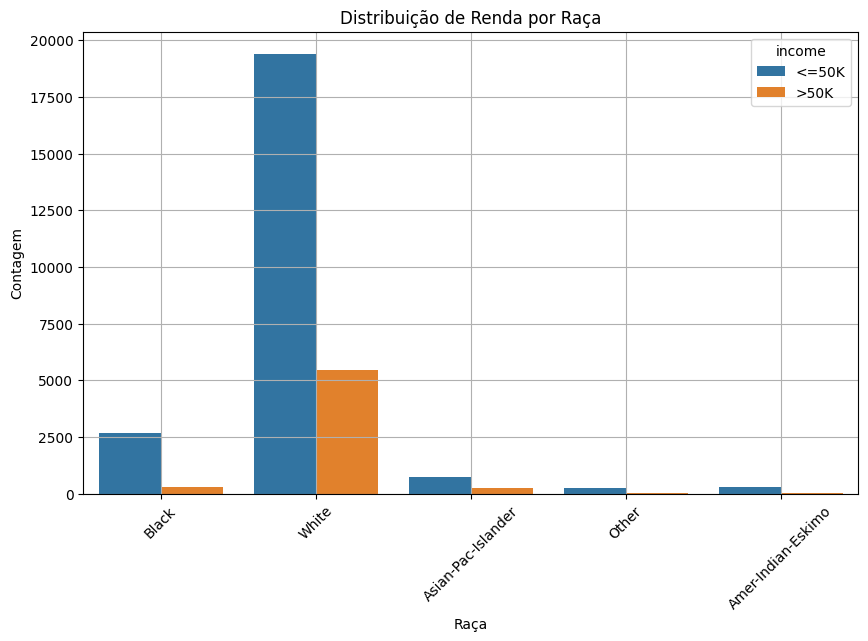

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=df)
plt.title('Distribuição de Renda por Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid()
plt.show()
